In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
churn_df=pd.read_csv("ChurnData.csv")
churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [4]:
print(churn_df.info())
print(churn_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [5]:
churn_df = churn_df[['tenure', 'age', 'address', 'income','ed', 'employ', 'equip',  'callcard', 'wireless','churn']]
churn_df['churn']=churn_df['churn'].astype('int')
print(churn_df.shape)
churn_df.head()

(200, 10)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [6]:
X=churn_df[['tenure', 'age', 'address', 'income','ed', 'employ', 'equip',  'callcard', 'wireless']]
#X=X.drop(['tenure'],axis=1)
Y=churn_df[['churn']]
np_X=np.asanyarray(X)
np_Y=np.asanyarray(Y)

In [7]:
from sklearn.preprocessing import StandardScaler ### Preprocess the data 
std_scl=StandardScaler()
std_scl.fit(np_X)
np_X_procs=std_scl.transform(np_X)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(np_X_procs, np_Y, test_size=0.3, random_state=4)
print('Train set:', X_train.shape,Y_train.shape)
print('Test set:', X_test.shape,Y_test.shape)

Train set: (140, 9) (140, 1)
Test set: (60, 9) (60, 1)


In [9]:
model=LogisticRegression (C=0.02, solver='liblinear',verbose=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

[LibLinear]iter  1 act 3.133e-01 pre 3.057e-01 delta 5.400e-01 f 1.941e+00 |g| 1.226e+00 CG   2
iter  2 act 1.374e-03 pre 1.367e-03 delta 5.400e-01 f 1.628e+00 |g| 7.967e-02 CG   2
iter  3 act 2.767e-06 pre 2.767e-06 delta 5.400e-01 f 1.626e+00 |g| 3.075e-03 CG   2
iter  4 act 1.905e-08 pre 1.905e-08 delta 5.400e-01 f 1.626e+00 |g| 2.815e-04 CG   2


In [10]:
Y_pred=model.predict(X_test)
Y_pred_prob=model.predict_proba(X_test)
print(Y_pred)
print ('\n')
print((Y_pred_prob))

[0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]


[[0.60815469 0.39184531]
 [0.59984592 0.40015408]
 [0.54709357 0.45290643]
 [0.71983536 0.28016464]
 [0.55517834 0.44482166]
 [0.64651145 0.35348855]
 [0.51239015 0.48760985]
 [0.59626731 0.40373269]
 [0.36710551 0.63289449]
 [0.63123031 0.36876969]
 [0.5522564  0.4477436 ]
 [0.59794635 0.40205365]
 [0.56418906 0.43581094]
 [0.38280034 0.61719966]
 [0.74379585 0.25620415]
 [0.51196842 0.48803158]
 [0.48298849 0.51701151]
 [0.44736909 0.55263091]
 [0.45036259 0.54963741]
 [0.61855193 0.38144807]
 [0.50783063 0.49216937]
 [0.49737955 0.50262045]
 [0.7238856  0.2761144 ]
 [0.49317814 0.50682186]
 [0.4647133  0.5352867 ]
 [0.78726431 0.21273569]
 [0.40986569 0.59013431]
 [0.48509641 0.51490359]
 [0.50248269 0.49751731]
 [0.79379172 0.20620828]
 [0.76512894 0.23487106]
 [0.57125564 0.42874436]
 [0.3862706  0.6137294 ]
 [0.79865674 0.20134326]
 [0.68832406 0.31167594]


Model achieved a classification accuracy of:	0.7166666666666667


Model Confusion Matrix


Jaccard Similarity Score:	0.32


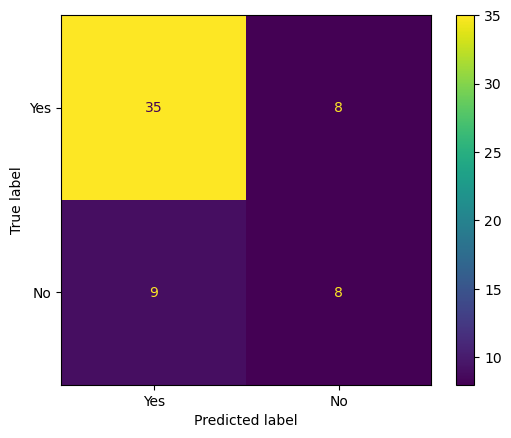

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Model achieved a classification accuracy of:",end='\t')
print (accuracy_score(Y_test,Y_pred))
dsp=ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred),display_labels=["Yes","No"])
print ('\n')
dsp.plot()
print ("Model Confusion Matrix")
from sklearn.metrics import jaccard_score
print('\n')
print("Jaccard Similarity Score:", end='\t')
print(jaccard_score(Y_test,Y_pred))

In [12]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        43
           1       0.50      0.47      0.48        17

    accuracy                           0.72        60
   macro avg       0.65      0.64      0.64        60
weighted avg       0.71      0.72      0.71        60

